In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "x": np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
    "y": np.array([50, 45, 40, 35, 30, 25 ,20, 15, 10, 5])
})
df

,x,y
0,0,50
1,1,45
2,2,40
3,3,35
4,4,30
5,5,25
6,6,20
7,7,15
8,8,10
9,9,5


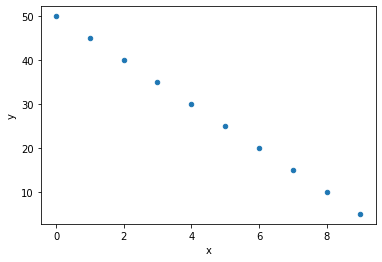

In [2]:
#1.1 DataFrame(df) の x, y についての散布図を出力してください。

df.plot.scatter("x", "y")

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#1.2 y を目的変数、x を説明変数として線形回帰によって分析し、係数と切片を表示してください。

reg = LinearRegression()

x = df["x"].values
y = df["y"].values

x = x.reshape(-1, 1)

reg.fit(x, y)

print("coef_:", reg.coef_)
print("intercept_", reg.intercept_)

coef_: [-5.]
intercept_ 50.00000000000001


In [5]:
#1.3 DataFrame（df） に 推論したyである preg_y を追加して表示してください。

df["preg_y"] = y
df

,x,y,preg_y
0,0,50,50
1,1,45,45
2,2,40,40
3,3,35,35
4,4,30,30
5,5,25,25
6,6,20,20
7,7,15,15
8,8,10,10
9,9,5,5


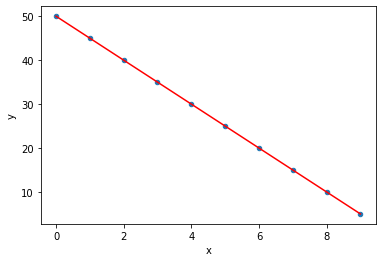

In [6]:
#1.4 DataFrame（df）の散布図に回帰式を表示してください。

ax = df.plot.scatter("x", "y")
ax.plot(x, y, color="red")

In [7]:
#1.5 x が100のとき、推論した y を表示してください。

my_x = [[100]]

print(reg.predict(my_x))

[-450.]


#演習2

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
import pandas as pd

In [10]:
#2.1 wgetコマンド以下のURLからでファイル（mydata.csv）をダウンロードしてください。
!wget https://gist.githubusercontent.com/murayama333/b897efa5d90a96f2b851bf14f1a6f8d3/raw/874c9771da2ea22365873112ef481537d094052c/mydata.csv

--2021-02-22 04:22:39--  https://gist.githubusercontent.com/murayama333/b897efa5d90a96f2b851bf14f1a6f8d3/raw/874c9771da2ea22365873112ef481537d094052c/mydata.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53 [text/plain]
Saving to: ‘mydata.csv’

mydata.csv          100%[===================>]      53  --.-KB/s    in 0s      

2021-02-22 04:22:39 (4.37 MB/s) - ‘mydata.csv’ saved [53/53]



In [11]:
#2.2 pandasのDataFrameで mydata.csv を表示してください。

mydata_df = pd.read_csv("mydata.csv")
mydata_df

,x,y
0,0,55
1,1,42
2,2,45
3,3,35
4,4,26
5,5,18
6,6,24
7,7,15
8,8,12
9,9,2


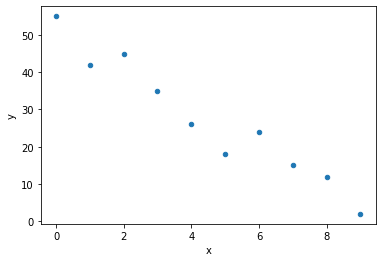

In [12]:
#2.3 DataFrame（mydata_df）の x と y の散布図を表示してください。
mydata_df.plot.scatter("x", "y")

In [13]:
#2.4 DataFrame（mydata_df）の x と y について相関係数を表示してください。
mydata_df.corr()

,x,y
x,1.000000,-0.970458
y,-0.970458,1.000000


In [20]:
#2.5 y を目的変数、 x を説明変数として線形回帰によって分析し、係数と切片を表示してください。

reg = LinearRegression()

x = mydata_df["x"].values
y = mydata_df["y"].values

x = x.reshape(-1, 1)

reg.fit(x, y)

print("coef_:", reg.coef_)
print("intercept_", reg.intercept_)

coef_: [-5.32121212]
intercept_ 51.345454545454544


In [27]:
#2.6 DataFrame（mydata_df） に 推論したyである preg_y を追加して表示してください。
mydata_df["preg_y"] = reg.predict(mydata_df[["x"]])
mydata_df

,x,y,preg_y
0,0,55,51.345455
1,1,42,46.024242
2,2,45,40.703030
3,3,35,35.381818
4,4,26,30.060606
5,5,18,24.739394
6,6,24,19.418182
7,7,15,14.096970
8,8,12,8.775758
9,9,2,3.454545


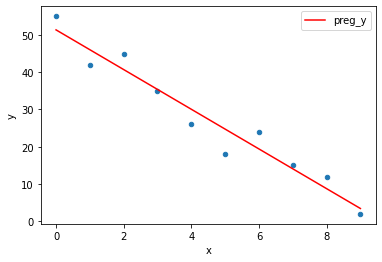

In [40]:
#2.7 DataFrame（mydata_df）の散布図に回帰式を表示してください。
ax = mydata_df.plot.scatter("x", "y", grid=True)
mydata_df.plot('x', 'preg_y', color="red", ax=ax)

In [56]:
#2.8.1 DataFrame(mydata_df) の y と preg_y の差分を求めて diff 列とし、DataFrameに追加して表示してください。
mydata_df['diff'] = mydata_df['y'] - mydata_df['preg_y']
mydata_df

,x,y,preg_y,diff
0,0,55,51.345455,3.654545
1,1,42,46.024242,-4.024242
2,2,45,40.703030,4.296970
3,3,35,35.381818,-0.381818
4,4,26,30.060606,-4.060606
5,5,18,24.739394,-6.739394
6,6,24,19.418182,4.581818
7,7,15,14.096970,0.903030
8,8,12,8.775758,3.224242
9,9,2,3.454545,-1.454545


In [64]:
#2.8.2 DataFrame(mydata_df) の diff 列の二乗値を求めて diff_square 列とし、DataFrameに追加して表示してください。

mydata_df['diff_square'] = mydata_df['diff'] ** 2
mydata_df

,x,y,preg_y,diff,diff_square
0,0,55,51.345455,3.654545,13.355702
1,1,42,46.024242,-4.024242,16.194527
2,2,45,40.703030,4.296970,18.463949
3,3,35,35.381818,-0.381818,0.145785
4,4,26,30.060606,-4.060606,16.488522
5,5,18,24.739394,-6.739394,45.419431
6,6,24,19.418182,4.581818,20.993058
7,7,15,14.096970,0.903030,0.815464
8,8,12,8.775758,3.224242,10.395739
9,9,2,3.454545,-1.454545,2.115702
